In [230]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud


import warnings
warnings.filterwarnings("ignore")

In [110]:
# Import the CSV file, save it in a data frame, and display the top 3 rows
df = pd.read_csv('content.csv')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [5]:
print('Total no. of rows:',df.shape[0])
print('Total no. of columns:',df.shape[1])

Total no. of rows: 8807
Total no. of columns: 12


In [6]:
# info about the columns and its data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [44]:
# putting the column names in a list
column_names = df.columns.tolist()
null_count = df.isnull().sum()
null_ratio = round(df.isnull().mean(),3)
nunique = df.nunique()
#display the dataframe with all the information
pd.DataFrame(np.vstack((column_names,null_count,null_ratio, nunique)).T, 
             columns = ['Columns','Null Count','Null Ratio','Unique Values'])

,Columns,Null Count,Null Ratio,Unique Values
0,show_id,0,0.0,8807
1,type,0,0.0,2
2,title,0,0.0,8807
3,director,2634,0.299,4528
4,cast,825,0.094,7692
5,country,831,0.094,748
6,date_added,10,0.001,1767
7,release_year,0,0.0,74
8,rating,4,0.0,17
9,duration,3,0.0,220


## EDA

In [60]:
#Distribution of Type of Contents
type_dist = df['type'].value_counts()
type_dist

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

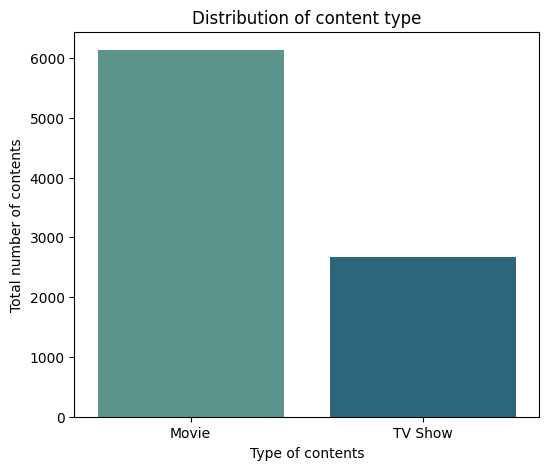

In [87]:
#visualizing the distribution in a barplot
fig = plt.figure(figsize=(6,5)) #setting the figure size
sns.barplot(x = type_dist.index,
                       y = type_dist.values, 
                       palette = 'crest')
plt.xlabel('Type of contents')
plt.ylabel('Total number of contents')
plt.title('Distribution of content type')
plt.show()

In [75]:
# Top 20 directors for the contents
top20_dirs = df['director'].value_counts().head(20)
top20_dirs

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Yılmaz Erdoğan             8
Lance Bangs                8
Kunle Afolayan             8
Quentin Tarantino          8
Ryan Polito                8
Troy Miller                8
Shannon Hartman            8
Fernando Ayllón            8
Name: count, dtype: int64

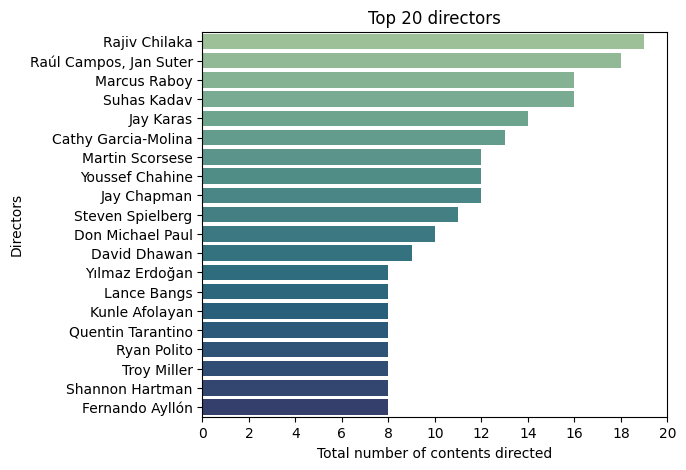

In [99]:
#visualizing the top 20 directors in a barplot
fig = plt.figure(figsize=(6,5)) #setting the figure size
sns.barplot(x = top20_dirs.values,
            y = top20_dirs.index, 
            palette = 'crest',
            )
plt.xlabel('Total number of contents directed')
plt.ylabel('Directors')
plt.title('Top 20 directors')
plt.xticks(range(0,max(top20_dirs)+2,2))

plt.show()


In [209]:
## Distribution of contents 
df['country'].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [106]:
### some of the contents were created in multiple countries
#lets visualize this in a world map using choropleth

In [112]:
df['country']

0       United States
1        South Africa
2                 NaN
3                 NaN
4               India
            ...      
8802    United States
8803              NaN
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [206]:
## Since there are some with more than one country lets combine all of them and put them in a different dataframe
country_count = {}

def count_countries(data):
    for s in data:
        if isinstance(s,str):
            if ',' in s:
                count_countries(s.split(','))
            else:
                s = s.strip()
                if s in country_count:
                    country_count[s] += 1
                else:
                    country_count[s] = 1
    df = pd.DataFrame([country_count]).T
    df.reset_index(inplace = True)
    df.columns = ['Country','Count']
    return df

country_data = count_countries(df['country'])

,Country,Count
0,United States,3690
1,South Africa,62
2,India,1046
3,Ghana,5
4,Burkina Faso,1
...,...,...
118,Sudan,1
119,Panama,1
120,Uganda,1
121,East Germany,1


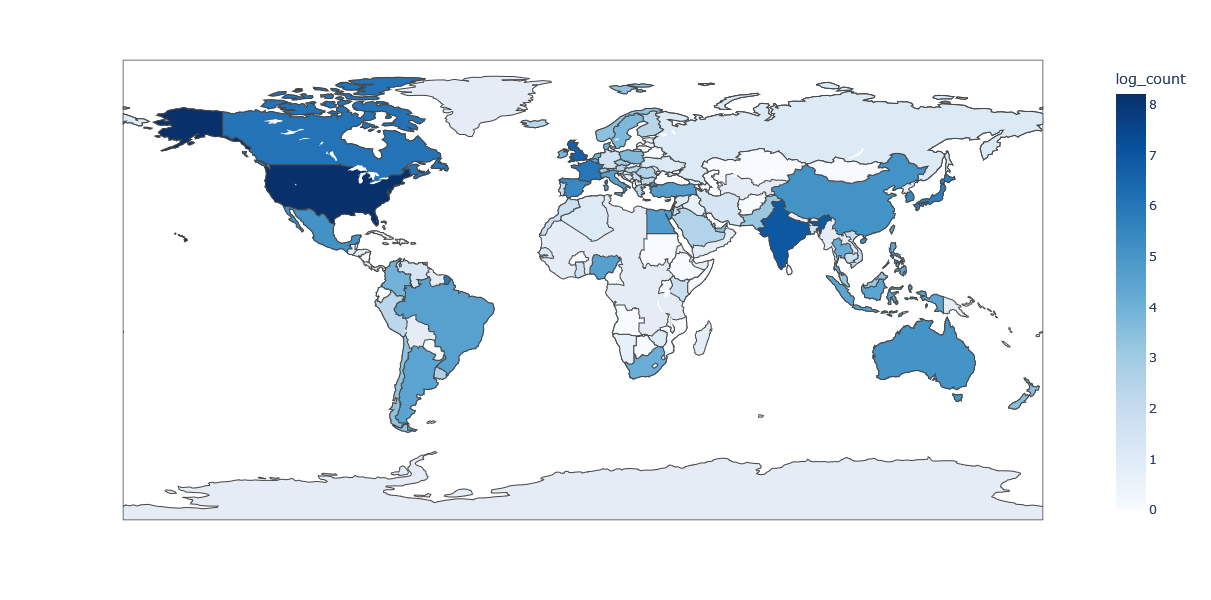

In [215]:
import math
country_data['log_count'] = [math.log(count) for count in country_data['Count']]
fig = px.choropleth(country_data, locations='Country',
                    locationmode='country names',
                    color= 'log_count', #use log to color as the difference between counts are significant
                    color_continuous_scale= px.colors.sequential.Blues,
                    custom_data=['Country', 'Count']
                   )

fig.update_traces(hovertemplate='<b>%{customdata[0]}</b><br>Count: %{customdata[1]}')
# update layout figure method
fig.update_layout(
    title_text='',
    width=1200,
    height=600,
)

fig.show()

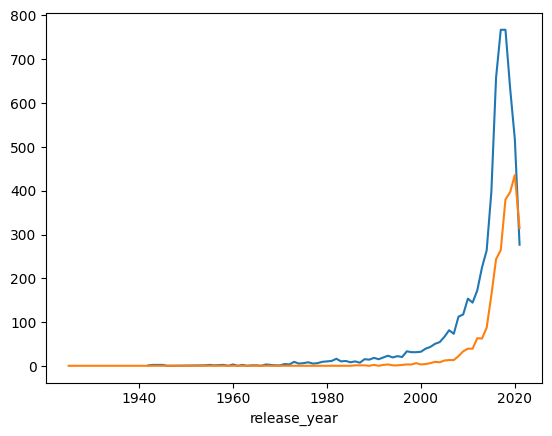

In [229]:
for t in df['type'].unique():
    a = df[df['type']==t]
    year_group = a.groupby('release_year')['show_id'].count()
    sns.lineplot(x=year_group.index,y=year_group.values)
    

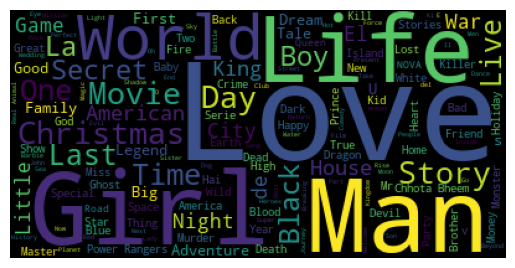

In [232]:
titles = df['title']
# Create and generate a word cloud image:
title_wordcloud = WordCloud().generate(' '.join(titles))

# Display the generated image:
plt.imshow(title_wordcloud)
plt.axis("off")
plt.show()


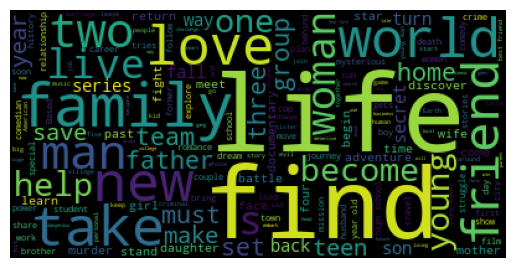

In [233]:
desc = df['description']
# Create and generate a word cloud image:
desc_wordcloud = WordCloud().generate(' '.join(desc))

# Display the generated image:
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.show()

In [234]:
df['date_added'] = df['date_added'].apply(pd.to_datetime)

In [235]:
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [238]:
last_date = max(df['date_added'])
last_date

Timestamp('2021-09-25 00:00:00')

In [242]:
last_year_data = df[df['date_added'] > last_date - pd.Timedelta(days = 365)]
last_year_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


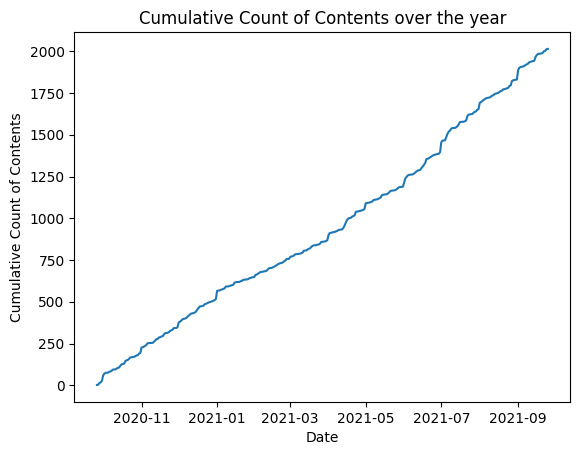

In [248]:
day_group = last_year_data.groupby('date_added')['show_id'].count()
# Calculating cumulative sum
cumulative_sum = day_group.cumsum()

# Plotting the cumulative sum
sns.lineplot(x=day_group.index, y=cumulative_sum)
plt.xlabel('Date')
plt.ylabel('Cumulative Count of Contents')
plt.title('Cumulative Count of Contents over the year')
plt.show()

In [250]:
second_last_year_data = df[(df['date_added'] < last_date - pd.Timedelta(days = 365)) & (df['date_added'] > last_date - pd.Timedelta(days = 2*365))]
second_last_year_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1957,s1958,Movie,Real Steel,Shawn Levy,"Hugh Jackman, Dakota Goyo, Evangeline Lilly, A...","United States, India",2020-09-24,2011,PG-13,127 min,"Action & Adventure, Sci-Fi & Fantasy, Sports M...",A struggling fighter-turned-promoter reconnect...
1958,s1959,TV Show,The Chef Show,NaN,"Jon Favreau, Roy Choi",United States,2020-09-24,2020,TV-MA,4 Seasons,Docuseries,"Writer, director and food enthusiast Jon Favre..."
1959,s1960,Movie,Enola Holmes,Harry Bradbeer,"Millie Bobby Brown, Henry Cavill, Sam Claflin,...",United Kingdom,2020-09-23,2020,PG-13,124 min,"Action & Adventure, Children & Family Movies, ...","While searching for her missing mother, intrep..."
1960,s1961,Movie,Kiss the Ground,"Joshua Tickell, Rebecca Harrell Tickell",Woody Harrelson,United States,2020-09-22,2020,TV-G,85 min,Documentaries,Science experts and celebrity activists unpack...
1961,s1962,TV Show,The Playbook,NaN,NaN,United States,2020-09-22,2020,TV-MA,1 Season,Docuseries,Coaches with championship résumés share their ...


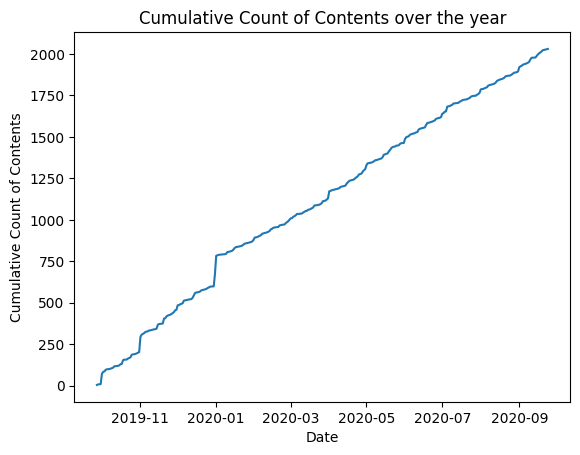

In [251]:
day_group = second_last_year_data.groupby('date_added')['show_id'].count()
# Calculating cumulative sum
cumulative_sum = day_group.cumsum()

# Plotting the cumulative sum
sns.lineplot(x=day_group.index, y=cumulative_sum)
plt.xlabel('Date')
plt.ylabel('Cumulative Count of Contents')
plt.title('Cumulative Count of Contents over the year')
plt.show()